# **Traffic Sign Detection Project**
I have built a Convolutional Neural Network (CNN) to classify images of various traffic signs like 'Turn right ahead',' Keep Left','Speed Limit 70 km/h' etc. Using OpenCV, I have predicted the traffic sign on each image in a webcam video. In this project I have used ImageDataGenerator class of Keras package for data augmentation.


 Submitted By- **Jatin Ahuja** <br/>
 Section- **DS** <br/>
 Roll No.-**05** <br/>
 Semester- **6th** <br/>
 University Roll No. - <b>2013348</b>

# **Importing Libraries**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unzip drive/My\ Drive/6th_semester_project/myData.zip

Streaming output truncated to the last 5000 lines.
 extracting: myData/5/5_13244_1577672002.0758326.png  
 extracting: myData/5/5_13245_1577672002.0768187.png  
 extracting: myData/5/5_13246_1577672002.0768187.png  
 extracting: myData/5/5_13247_1577672002.0778143.png  
 extracting: myData/5/5_13248_1577672002.078812.png  
 extracting: myData/5/5_13249_1577672002.0798092.png  
 extracting: myData/5/5_13250_1577672002.0798092.png  
 extracting: myData/5/5_13251_1577672002.0808067.png  
 extracting: myData/5/5_13252_1577672002.0818043.png  
 extracting: myData/5/5_13253_1577672002.082801.png  
 extracting: myData/5/5_13254_1577672002.082801.png  
 extracting: myData/5/5_13255_1577672002.0837986.png  
 extracting: myData/5/5_13256_1577672002.084796.png  
 extracting: myData/5/5_13257_1577672002.0857933.png  
 extracting: myData/5/5_13258_1577672002.0857933.png  
 extracting: myData/5/5_13259_1577672002.0867918.png  
 extracting: myData/5/5_13260_1577672002.0877888.png  
 extracting: myDat

## **Importing Dataset And Data Preprocessing**

In [ ]:
Features = []
Target = []
for i in range(43):
    ImageNames=os.listdir("myData" + "/" + str(i))
    for name in ImageNames:
            ImageAsArray=cv2.imread("myData" + "/" + str(i) + "/"+ name)
            Features.append(ImageAsArray)
            Target.append(i)
    print("Inside folder- ",i)

Inside folder-  0
Inside folder-  1
Inside folder-  2
Inside folder-  3
Inside folder-  4
Inside folder-  5
Inside folder-  6
Inside folder-  7
Inside folder-  8
Inside folder-  9
Inside folder-  10
Inside folder-  11
Inside folder-  12
Inside folder-  13
Inside folder-  14
Inside folder-  15
Inside folder-  16
Inside folder-  17
Inside folder-  18
Inside folder-  19
Inside folder-  20
Inside folder-  21
Inside folder-  22
Inside folder-  23
Inside folder-  24
Inside folder-  25
Inside folder-  26
Inside folder-  27
Inside folder-  28
Inside folder-  29
Inside folder-  30
Inside folder-  31
Inside folder-  32
Inside folder-  33
Inside folder-  34
Inside folder-  35
Inside folder-  36
Inside folder-  37
Inside folder-  38
Inside folder-  39
Inside folder-  40
Inside folder-  41
Inside folder-  42


In [ ]:
Features = np.array(Features)

In [ ]:
Target = np.array(Target)

In [ ]:
Features.shape

(34799, 32, 32, 3)

In [ ]:
Target.shape

(34799,)

# **Splitting Dataset Into Train And Test Data**

In [ ]:
train_features,test_features,train_target,test_target = train_test_split(Features, Target, test_size = 0.2)

In [ ]:
train_features.shape

(27839, 32, 32, 3)

In [ ]:
test_features.shape

(6960, 32, 32, 3)

In [ ]:
def preprocessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    
    img = img/255                                  
    return img

In [ ]:
train_features = list(map(preprocessing,train_features))

In [ ]:
test_features = list(map(preprocessing,test_features))

In [ ]:
train_features = np.array(train_features)

In [ ]:
test_features = np.array(test_features)

In [ ]:
train_features.shape

(27839, 32, 32)

In [ ]:
test_features.shape

(6960, 32, 32)

In [ ]:
train_features = train_features.reshape(27839, 32, 32,1)

In [ ]:
test_features = test_features.reshape(6960, 32, 32,1)

## **Generating new images by applying Shift, Rorate and Zoom**

In [ ]:
dataGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [ ]:
dataGen.fit(train_features)

In [ ]:
train_features.shape

(27839, 32, 32, 1)

In [ ]:
batches = dataGen.flow(train_features, train_target, batch_size = 20)

In [ ]:
len(batches)

1392

In [ ]:
batches

In [ ]:
x_batch,y_batch = next(batches)

In [ ]:
x_batch.shape

(20, 32, 32, 1)

In [ ]:
y_batch.shape

(20,)

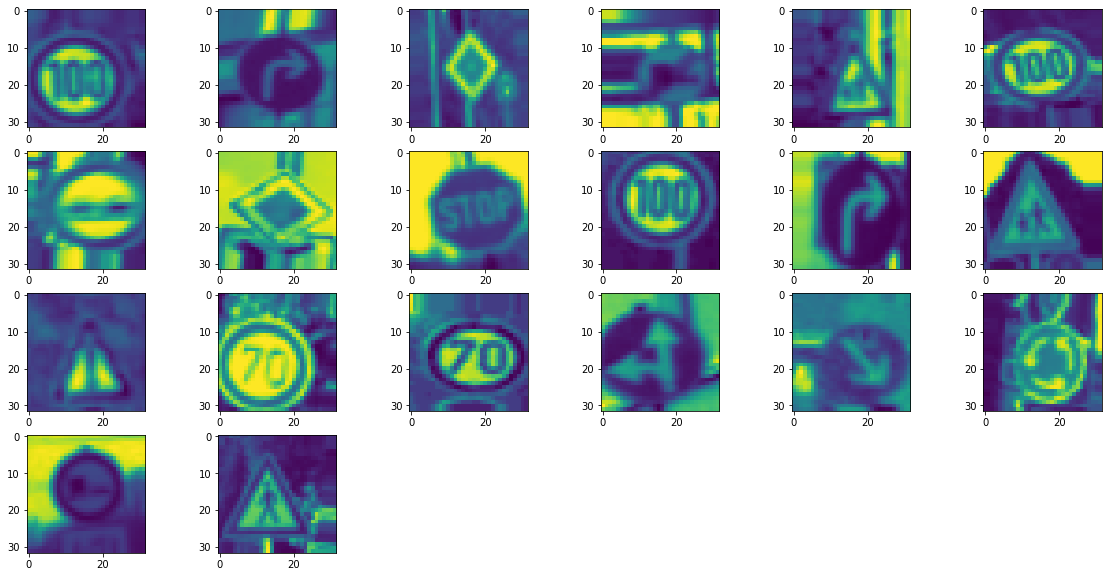

In [ ]:
plt.figure(figsize = (20,10))
for j in range(20):
    plt.subplot(4,6,j+1)
    plt.imshow(x_batch[j].reshape(32,32))
plt.show()

In [ ]:
train_target.shape

(27839,)

In [ ]:
train_target = to_categorical(train_target,43)

In [ ]:
test_target = to_categorical(test_target,43)

## **Model Architecture**

In [ ]:
def Model():
    model = Sequential()
    model.add(Conv2D(60,(5,5), input_shape = (32,32,1),activation = "relu"))
    model.add(Conv2D(60,(5,5), activation = "relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation="softmax"))
    return model

In [ ]:
model = Model()

## **Model Compilling and Fitting**

In [ ]:
model.compile(Adam(lr = 0.001),loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit_generator(dataGen.flow(train_features,train_target,batch_size = 20),epochs = 30)

Epoch 1/30
1392/1392 [==============================] - 228s 164ms/step - loss: 3.2637 - accuracy: 0.1282
Epoch 2/30
1392/1392 [==============================] - 229s 165ms/step - loss: 1.4362 - accuracy: 0.5708
Epoch 3/30
1392/1392 [==============================] - 229s 165ms/step - loss: 0.8733 - accuracy: 0.7367
Epoch 4/30
1392/1392 [==============================] - 229s 165ms/step - loss: 0.6433 - accuracy: 0.8050
Epoch 5/30
1392/1392 [==============================] - 229s 164ms/step - loss: 0.5276 - accuracy: 0.8406
Epoch 6/30
1392/1392 [==============================] - 229s 164ms/step - loss: 0.4378 - accuracy: 0.8673
Epoch 7/30
1392/1392 [==============================] - 229s 165ms/step - loss: 0.3740 - accuracy: 0.8870
Epoch 8/30
1392/1392 [==============================] - 229s 165ms/step - loss: 0.3323 - accuracy: 0.8986
Epoch 9/30
1392/1392 [==============================] - 228s 164ms/step - loss: 0.3083 - accuracy: 0.9056
Epoch 10/30
1392/1392 [=======================

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/6th_semester_project/traffic_name')

In [ ]:
model1= model.save("Saved_model")

INFO:tensorflow:Assets written to: Saved_model/assets


In [ ]:
model.evaluate(test_features, test_target, batch_size = 20)

348/348 [==============================] - 13s 36ms/step - loss: 0.0301 - accuracy: 0.9902


[0.030134176835417747, 0.9902299046516418]

## **Making Predictions**

In [ ]:
predictions = model.predict(test_features)

In [ ]:
predictions[100]

array([3.2204325e-34, 2.1653283e-22, 3.1781297e-21, 2.0806421e-17,
       1.1143788e-27, 1.2369619e-22, 1.0599501e-19, 1.5369990e-24,
       9.5014405e-35, 1.2227222e-24, 7.6288597e-27, 1.7078930e-28,
       1.5891838e-19, 3.4095331e-20, 6.0829786e-11, 1.8718634e-22,
       1.5990982e-24, 2.6774304e-19, 4.6417266e-25, 0.0000000e+00,
       6.6968395e-35, 0.0000000e+00, 6.2261516e-30, 4.7815881e-32,
       5.1989151e-36, 8.5823386e-33, 5.4557281e-24, 2.0344243e-30,
       9.9602954e-23, 5.2263209e-34, 3.5696660e-31, 0.0000000e+00,
       9.7958985e-22, 1.0000000e+00, 6.5131114e-23, 4.0918480e-15,
       1.7222404e-13, 1.1117072e-21, 1.4196481e-18, 8.6715080e-21,
       9.0730747e-22, 4.8866141e-20, 8.5829319e-17], dtype=float32)

In [ ]:
np.argmax(predictions[100])

33

In [ ]:
test_target[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

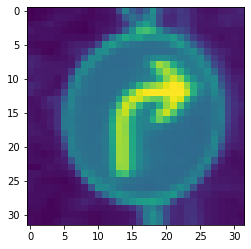

In [ ]:
plt.imshow(test_features[100].reshape(32,32))
plt.show()

In [ ]:
predictions[1500]

array([4.02982948e-07, 1.39627846e-05, 3.16813475e-06, 4.25212443e-09,
       1.16399875e-04, 4.68751153e-08, 1.41312539e-05, 2.68692446e-07,
       5.82564951e-07, 2.21314508e-06, 1.99098153e-07, 9.01394669e-05,
       4.07765120e-01, 1.95373905e-05, 1.87003228e-04, 3.54576332e-05,
       2.78439285e-04, 3.37978854e-05, 1.20177583e-05, 9.71271788e-07,
       1.56407520e-09, 3.59758076e-07, 7.03410450e-08, 4.67994266e-09,
       2.62582223e-08, 2.19139736e-03, 8.62259526e-07, 5.04601783e-09,
       6.20358342e-09, 2.31860975e-09, 3.92363432e-07, 7.46319841e-08,
       4.07309388e-04, 3.17807093e-07, 2.05790684e-06, 3.64470834e-05,
       4.10182022e-09, 2.68948668e-08, 6.85173882e-06, 5.79896629e-01,
       7.96170149e-04, 7.97014590e-03, 1.16965501e-04], dtype=float32)

In [ ]:
np.argmax(predictions[1500])

39

In [ ]:
test_target[1500]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

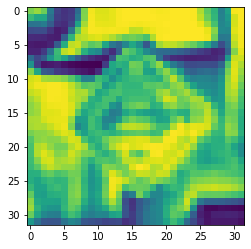

In [ ]:
plt.imshow(test_features[1500].reshape(32,32))
plt.show()

In [ ]:
predictions[2500]

array([1.0380843e-13, 9.1877181e-09, 1.7131931e-10, 5.0668053e-08,
       3.3938566e-12, 5.7546368e-10, 7.6055941e-16, 2.1277298e-12,
       1.2418308e-15, 1.4203404e-11, 6.4964197e-12, 1.4285516e-10,
       4.7218247e-09, 2.9945613e-07, 1.6922118e-12, 6.4532858e-11,
       3.9838980e-19, 8.2713939e-17, 9.4659107e-12, 7.1876034e-16,
       1.9669500e-20, 3.7505208e-16, 1.8651547e-15, 6.1200087e-18,
       2.5266279e-18, 5.2397836e-11, 5.1731753e-13, 4.6975028e-15,
       1.2038643e-12, 3.9795319e-15, 2.5257633e-16, 1.9406584e-17,
       4.8192629e-13, 9.5680122e-09, 1.0269449e-05, 9.9998808e-01,
       8.0774242e-07, 5.3035217e-07, 6.1886435e-10, 2.7399022e-16,
       2.9303941e-09, 8.6105859e-14, 1.7141524e-12], dtype=float32)

In [ ]:
np.argmax(predictions[2500])

35

In [ ]:
test_target[2500]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

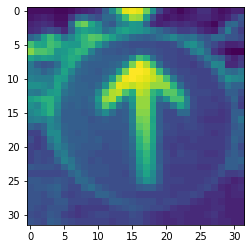

In [ ]:
plt.imshow(test_features[2500].reshape(32,32))
plt.show()

In [ ]:
predictions[5000]

array([1.7087344e-10, 7.3870994e-09, 1.6711832e-11, 4.5591897e-10,
       5.1394039e-19, 2.8321383e-11, 1.4077345e-10, 1.0568383e-15,
       1.6297782e-16, 2.1945060e-14, 1.2866432e-14, 6.5833883e-05,
       3.8860009e-12, 4.8270806e-13, 2.5297773e-13, 6.9037259e-19,
       2.3965069e-13, 1.4121851e-14, 8.4664968e-08, 9.7097308e-13,
       6.0064356e-13, 1.3206097e-09, 2.4629897e-11, 6.0091980e-09,
       9.9837034e-11, 5.1153131e-09, 6.4162018e-12, 2.3043019e-04,
       9.9970156e-01, 2.6764639e-07, 9.1982787e-07, 6.4572500e-14,
       3.3903338e-13, 6.0198123e-12, 6.4720961e-14, 1.2054101e-08,
       1.0294821e-07, 2.1498001e-10, 6.8421156e-07, 1.1478099e-13,
       3.3070833e-08, 6.7539133e-13, 1.0600084e-14], dtype=float32)

In [ ]:
np.argmax(predictions[5000])

28

In [ ]:
test_target[5000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

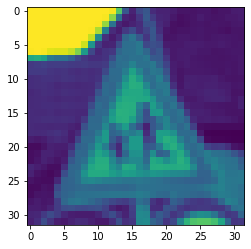

In [ ]:
plt.imshow(test_features[5000].reshape(32,32))
plt.show()

## **Predicting On Webcam Images**

In [ ]:
def className(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


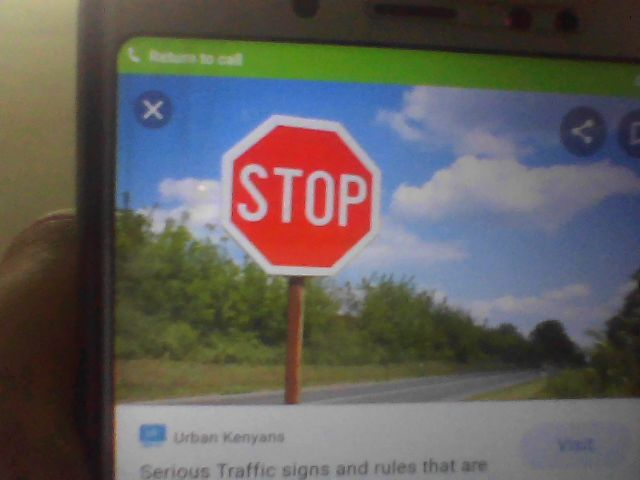

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
while True:
    frame=cv2.imread("photo.jpg")
    image = cv2.resize(frame, (32,32))
    image = preprocessing(image)
    image = image.reshape(1,32,32,1)
    cv2.putText(frame,"Class",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),2)
    cv2.putText(frame,"Probability",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),2)
    probabilities = model.predict(image)
    class_idx = np.argmax(probabilities)
    max_probability = np.amax(probabilities)
    if max_probability > 0.30:
        cv2.putText(frame,className(class_idx),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),2)
        cv2.putText(frame,str(max_probability) + "%",(120,120),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),2)
    cv2_imshow(frame)
    cv2.waitKey(0)
    break

cv2.destroyAllWindows()